In [1]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib

In [2]:
raw_results = np.load("auc.npz", allow_pickle=True)
print(list(raw_results.keys()))

['beta', 'roc', 'original_roc_info']


In [3]:
locals().update(raw_results)

/tmp/ipykernel_21182/2269370255.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(pfn_tp, 1/pfn_fp, c = cmap(beta[i]))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


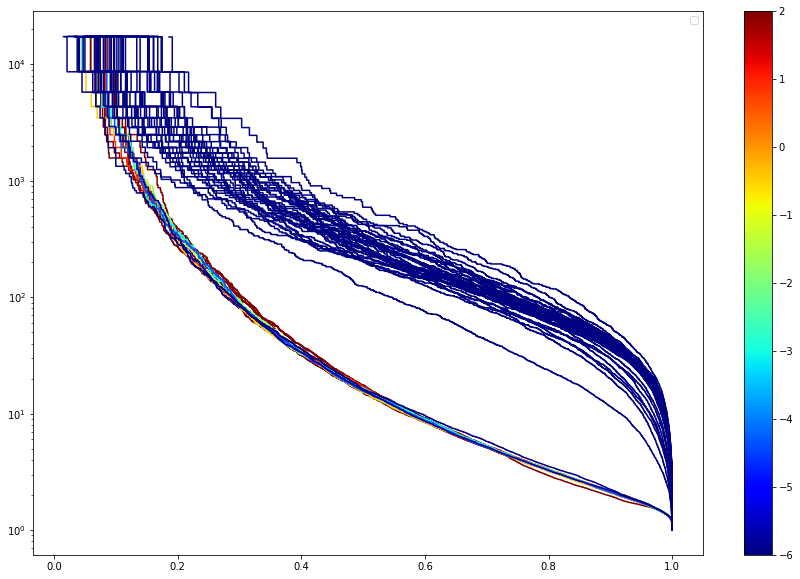

In [4]:
plt.figure(figsize=(15,10))
cmap = plt.get_cmap('jet')
for i, (pfn_fp, pfn_tp, threshs) in enumerate(roc):
    plt.plot(pfn_tp, 1/pfn_fp, c = cmap(beta[i]))
norm = matplotlib.colors.Normalize(vmin=beta.min(), vmax=beta.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)
plt.legend()
plt.yscale("log")
plt.show()

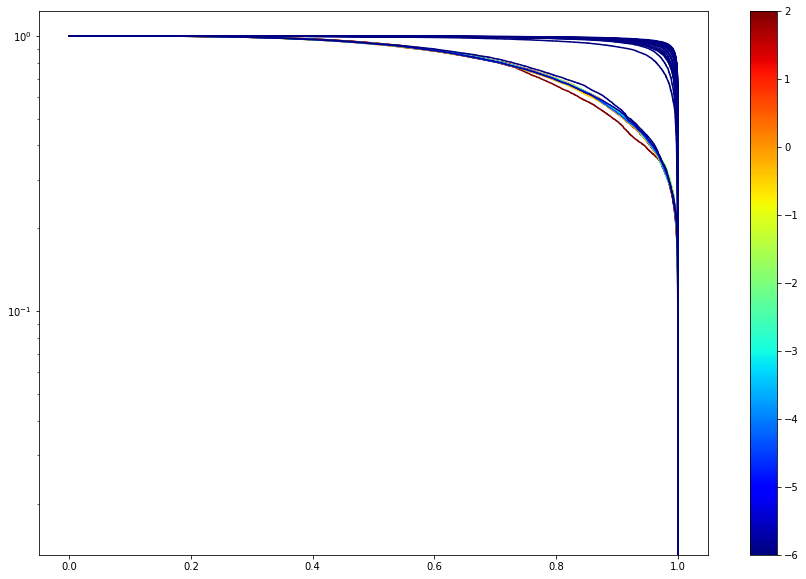

In [5]:
plt.figure(figsize=(15,10))
cmap = plt.get_cmap('jet')
for i, (pfn_fp, pfn_tp, threshs) in enumerate(roc):
    plt.plot(pfn_tp, 1-pfn_fp, c = cmap(beta[i]))
norm = matplotlib.colors.Normalize(vmin=beta.min(), vmax=beta.max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)
plt.yscale("log")
plt.show()

In [6]:
original_roc_info

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.15377511e-01, 9.15492958e-01, 1.00000000e+00],
       [0.00000000e+00, 7.76287932e-03, 1.20613332e-02, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 9.99999881e-01, ...,
        1.52556812e-08, 1.52540505e-08, 1.03388796e-35]])

In [7]:
data_base_dir = "/global/home/users/yifengh3/VAE/vec_data/recon_data"
raw_b_signals = np.load(os.path.join(data_base_dir, "pfn_bsignal.npz")) 
raw_hv_signals = np.load(os.path.join(data_base_dir, "pfn_hv_signal.npz"))

In [9]:
signal_1_recons = raw_b_signals["recon"]
signal_2_recons = raw_hv_signals["recon"]

In [10]:
signal1 = raw_b_signals["data"]
signal2 = raw_hv_signals["data"]

In [11]:
def event_mass(myinput, pbar=True):
    ms = []
    for i in tqdm(range(len(myinput)), disable= not pbar):
        px = np.sum(myinput[i,:,0].flatten()*np.cos(myinput[i,:,2].flatten()))
        py = np.sum(myinput[i,:,0].flatten()*np.sin(myinput[i,:,2].flatten()))
        pz = np.sum(myinput[i,:,0].flatten()*np.sinh(myinput[i,:,1].flatten()))
        E = np.sum(myinput[i,:,0].flatten()*np.cosh(myinput[i,:,1].flatten()))
        ms += [(E**2-px*px-py*py-pz*pz)**0.5]
    return np.array(ms)

100%|████████████████████████████████| 155841/155841 [00:06<00:00, 23877.94it/s]


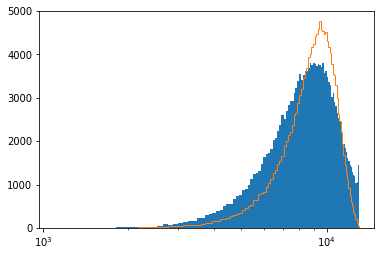

In [23]:
em1 = event_mass(signal1)
em2 = event_mass(signal2)
_,b,_ = plt.hist(em1, bins=100)
plt.hist(em2, histtype="step", bins=b)
plt.xscale("log")

In [26]:
raw_b_signals["beta"][0]

2.0

100%|████████████████████████████████| 155841/155841 [00:06<00:00, 25171.70it/s]


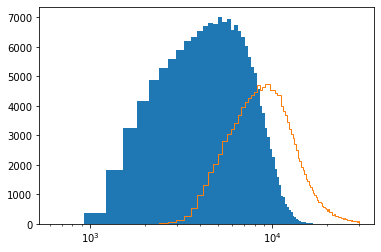

In [24]:
em1 = event_mass(signal_1_recons[0])
em2 = event_mass(signal_2_recons[0])
_,b,_ = plt.hist(em1, bins=100)
plt.hist(em2, histtype="step", bins=b)
plt.xscale("log")

In [ ]:
_,b,_ = plt.hist(, bins=100)
plt.hist(em2, histtype="step", bins=b)
plt.xscale("log")